# Non PC Tangle Data

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tangle import Tangle, node_graph, watcher, analyser
from PC_classes import mal_node

In [2]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t2 = Tangle(rate=5, tip_selection='mcmc', plot=True)
    ng2 = node_graph(t2)
    w2 = watcher(t2, ng2, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng2.new_node()

    while t2.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t2.rate)
        t2.time += dt_time
        ng2.nodes[node].issue_transaction()
        w2.update()
        print(t2.time)

    w2.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000227A31B61E0>]
Edges []
Node IDS [0]
Weights [[0, 656, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000227A31B61E0>, <tangle.node object at 0x00000227C2D202C0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 656, 1], [1, 1371, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000227A31B61E0>, <tangle.node object at 0x00000227C2D202C0>, <tangle.node object at 0x00000227C2D20320>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 656, 1], [1, 1371, 1], [2, 84, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000227A31B61E0>, <tangle.node object at 0x00000227C2D202C0>, <tangle.node object at 0x00000227C2D20320>, <tangle.node object at 0x00000227C2907CE0>]
Edges [(1, 0), (2, 0), (2, 1), (3, 1), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 656, 1], [1, 1371, 1], [2, 84, 1], [3, 974, 1]]
------------
T

[[1, 1.0, 198], [2, 1.0, 239], [3, 1.0121951219512195, 246], [4, 1.3400809716599191, 247], [5, 2.0843373493975905, 249], [6, 3.5682656826568264, 271], [7, 5.645299145299146, 234], [8, 7.673003802281369, 263], [9, 9.576470588235294, 255], [10, 11.887931034482758, 232], [11, 13.88888888888889, 243], [12, 16.268595041322314, 242], [13, 18.271653543307085, 254], [14, 20.389558232931726, 249], [15, 22.894736842105264, 247], [16, 25.582375478927204, 261], [17, 27.962809917355372, 242], [18, 30.396825396825395, 252], [19, 32.423529411764704, 255], [20, 35.84496124031008, 258], [21, 37.72692307692308, 260], [22, 40.6, 245], [23, 42.545081967213115, 244], [24, 44.65758754863813, 257], [25, 47.87313432835821, 268], [26, 49.98479087452471, 263], [27, 53.074074074074076, 270], [28, 55.61454545454546, 275], [29, 58.917647058823526, 255], [30, 60.62921348314607, 267], [31, 63.229885057471265, 261], [32, 65.90254237288136, 236], [33, 68.34453781512605, 238], [34, 70.0079365079365, 252], [35, 73.12601

Text(0, 0.5, 'Confirmations')

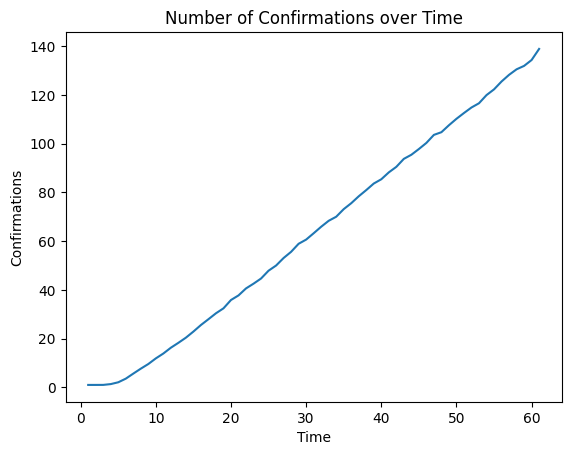

In [3]:
a2 = analyser()
results2 = a2.get_res(100)
df2 = pd.DataFrame(results2)
confirmed2 = df2[1].tolist()
times2 = df2[0].tolist()
plt.plot(times2, confirmed2)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [4]:
#df2.to_csv("Non-PC-r5 100")